In [1]:
#*******************************************************************************************
 #
 #  File Name:  crypto_clustering.ipynb
 #
 #  File Description:
 #      This IPython notebook, crypto_clustering.ipynb, reads a csv file,
 #      crypto_market_data.csv, in the folder, resources, and uses Python 
 #      and unsupervised learning methods such as K-Means to examine how 
 #      24-hour or 7-day price changes affect cryptocurrencies.
 #
 #
 #  Date            Description                             Programmer
 #  ----------      ------------------------------------    ------------------
 #  11/20/2023      Initial Development                     Nicholas J. George
 #
 #******************************************************************************************/

import kmeans_analysis_functions
import log_subroutines
import pandas_process_functions

import pandas as pd
import hvplot.pandas

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
CONSTANT_LOCAL_FILE_NAME = 'crypto_clustering.ipynb'

CONSTANT_CRYPTO_CSV_FILE_PATH = './resources/crypto_market_data.csv'


log_subroutines.set_log_mode(False)

log_subroutines.set_image_mode(False)

log_subroutines.begin_program('crypto_clustering')

# <br> **Section 1: Data Preparation**

## **Section 1.1: Data Retrievel**

### **Read CSV File into DataFrame**

In [3]:
data_type_dictionary \
    = {'coin_id': str,
       'price_change_percentage_24h': float,
       'price_change_percentage_7d': float,
       'price_change_percentage_14d': float,
       'price_change_percentage_30d': float,
       'price_change_percentage_60d': float,
       'price_change_percentage_200d': float,
       'price_change_percentage_1y': float}

crypto_dataframe \
    = pd.read_csv(CONSTANT_CRYPTO_CSV_FILE_PATH, index_col = 'coin_id', dtype = data_type_dictionary)

log_subroutines.log_write_object(crypto_dataframe)

## **Section 1.2: Display Data**

### **Display DataFrame Table**

In [4]:
pandas_process_functions.return_formatted_table \
    (crypto_dataframe, 'Table 1.2.1: Cryptocurrencies DataFrame Table', hide_index_boolean = False)

### **Display DataFrame Summary Statistics**

In [5]:
pandas_process_functions.return_formatted_description \
    (crypto_dataframe, 'Table 1.2.2: Cryptocurrencies DataFrame Summary Statistics')

### **Display DataFrame Information**

In [6]:
log_subroutines.print_and_log_text \
    ('\033[1m' + 'Table 1.2.3: Cryptocurrencies DataFrame Information:\n' + '\033[0m')

crypto_dataframe.info(verbose = True, memory_usage = True, show_counts = True)

Table 1.2.3: Cryptocurrencies DataFrame Information:

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7)
memory usage: 2.6+ KB


### **Display DataFrame HVPlot**

In [7]:
crypto_dataframe.hvplot.line \
    (title = '1.2.4: Cryptocurrencies Price Change (%)',
     xlabel = 'Cryptocurrency',
     ylabel = 'Price Change (%)',
     fontsize = {'title': 18.0, 
                 'xlabel': 12.0, 
                 'ylabel': 12.0, 
                 'ticks': 10.0, 
                 'legend': 10.0},
     grid = True,
     height = 480,
     width = 960,
     rot = 90,
     legend = 'right')

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

## **Section 1.3: Machine Learning Preparation**

### **Normalize the Cryptocurrency Data**

In [8]:
normalized_crypto_nparray = StandardScaler().fit_transform(crypto_dataframe)

log_subroutines.log_write_object(normalized_crypto_nparray)

### **Create a Normalized Cryptocurrency DataFrame**

In [9]:
normalized_crypto_dataframe \
    = pd.DataFrame(normalized_crypto_nparray, columns = crypto_dataframe.columns, index = crypto_dataframe.index)
    
log_subroutines.log_write_object(normalized_crypto_dataframe)

### **Display Normalized Cryptocurrency DataFrame Table**

In [10]:
pandas_process_functions.return_formatted_table \
    (normalized_crypto_dataframe, 'Table 1.3.1: Normalized Cryptocurrency DataFrame Table')

### **Display Normalized Cryptocurrency DataFrame Summary Statistics**

In [11]:
pandas_process_functions.return_formatted_description \
    (normalized_crypto_dataframe, 'Table 1.3.2: Normalized Cryptocurrency DataFrame Summary Statistics')

### **Display DataFrame Information**

In [12]:
log_subroutines.print_and_log_text \
    ('\033[1m' + 'Table 1.3.3: Normalized Cryptocurrency DataFrame Information:\n' + '\033[0m')

normalized_crypto_dataframe.info(verbose = True, memory_usage = True, show_counts = True)

Table 1.3.3: Normalized Cryptocurrency DataFrame Information:

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7)
memory usage: 2.6+ KB


### **Display DataFrame HVPlot**

In [13]:
normalized_crypto_dataframe.hvplot.line \
    (title = '1.2.4: Normalized Cryptocurrency Price Change (%)',
     xlabel = 'Cryptocurrency',
     ylabel = 'Price Change (%)',
     fontsize = {'title': 16.0, 
                 'xlabel': 12.0, 
                 'ylabel': 12.0, 
                 'ticks': 10.0, 
                 'legend': 10.0},
     grid = True,
     height = 480,
     width = 960,
     rot = 90,
     legend = 'right')

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

# <br> **Section 2: Find the Best Value for k Using the Original Data**

## **Section 2.1:  K-Means Methods**

### **WCSS Elbow Method**

In [14]:
optimal_k_elbow_integer, inertia_elbow_series \
    = kmeans_analysis_functions.return_optimal_k_with_wcss_elbow(normalized_crypto_dataframe)

log_subroutines.print_and_log_text \
    ('\033[1m' + 'Using the WCSS Elbow Method, the optimal value for k is '
     + '{:,}.'.format(optimal_k_elbow_integer) + '\033[0m')

Using the WCSS Elbow Method, the optimal value for k is 4.


### **Calinski-Harabasz Method**

In [15]:
optimal_k_calinski_harabasz_integer, inertia_calinski_harabasz_series \
    = kmeans_analysis_functions.return_optimal_k_with_calinski_harabasz(normalized_crypto_dataframe)

log_subroutines.print_and_log_text \
    ('\033[1m' + 'Using the Calinski-Harabasz Method, the optimal value for k is '
     + '{:,}.'.format(optimal_k_calinski_harabasz_integer) + '\033[0m')

Using the Calinski-Harabasz Method, the optimal value for k is 4.


### **Silhouette method**

In [16]:
optimal_k_silhouette_integer, inertia_silhouette_series \
    = kmeans_analysis_functions.return_optimal_k_with_silhouette(normalized_crypto_dataframe)

log_subroutines.print_and_log_text \
    ('\033[1m' + 'Using the Silhouette Method, the optimal value for k is '
     + '{:,}.'.format(optimal_k_silhouette_integer) + '\033[0m')

Using the Silhouette Method, the optimal value for k is 3.


### **Davies-Bouldin Method**

In [17]:
optimal_k_davies_bouldin_integer, inertia_davies_bouldin_series \
    = kmeans_analysis_functions.return_optimal_k_with_davies_bouldin(normalized_crypto_dataframe)

log_subroutines.print_and_log_text \
    ('\033[1m' + 'Using the Davies-Bouldin Method, the optimal value for k is '
     + '{:,}.'.format(optimal_k_davies_bouldin_integer) + '\033[0m')

Using the Davies-Bouldin Method, the optimal value for k is 2.


## **Section 2.2:  Display K-Means Method Plots**

### **Display Line Graphs**

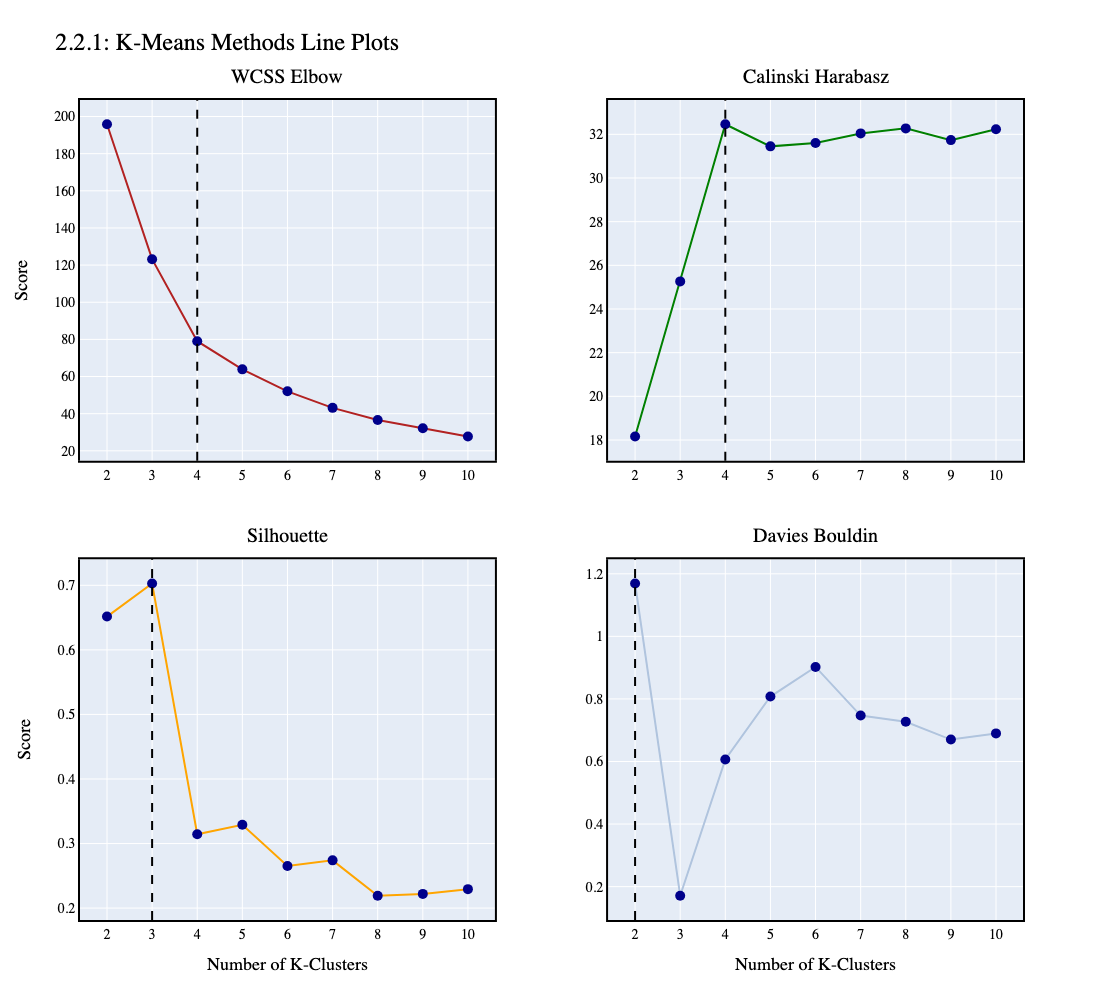

In [18]:
inertia_series_list \
    = [inertia_elbow_series, 
       inertia_calinski_harabasz_series,
       inertia_silhouette_series, 
       inertia_davies_bouldin_series]

optimal_k_integer_list \
    = [optimal_k_elbow_integer, 
       optimal_k_calinski_harabasz_integer,
       optimal_k_silhouette_integer, 
       optimal_k_davies_bouldin_integer]

colors_string_list \
    = ['firebrick', 
       'green',
       'orange',
       'lightsteelblue', 
       'gold', 
       'purple', 
       'blue']

kmeans_analysis_functions.return_cluster_plots \
    (optimal_k_integer_list, inertia_series_list, colors_string_list, '2.2.1: K-Means Methods Line Plots')

### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** Although both k=3 and k=4 are possible answers, the cluster predictions from the WCSS Elbow Method point to k=4 being the best value for `k`.

# <br> **Section 3: Cluster Cryptocurrencies with K-means**

## **Section 3.1: Predict the Clusters to Group the Cryptocurrencies**

### **Calculations**

In [19]:
predictions_integer_list_list \
    = kmeans_analysis_functions.return_cluster_predictions(normalized_crypto_dataframe, [2, 3, 4])

### **Display**

In [20]:
log_subroutines.print_and_log_text \
    ('\033[1m' + 'The array of cluster predictions for k = 2 is as follows:\n\n' + '\033[0m'
     + f'{predictions_integer_list_list[0]}')

The array of cluster predictions for k = 2 is as follows:

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0
 1 1 1 1]


In [21]:
log_subroutines.print_and_log_text \
    ('\033[1m' + 'The array of cluster predictions for k = 3 is as follows:\n\n' + '\033[0m'
     + f'{predictions_integer_list_list[1]}')

The array of cluster predictions for k = 3 is as follows:

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2
 0 0 0 0]


In [22]:
log_subroutines.print_and_log_text \
    ('\033[1m' + 'The array of cluster predictions for k = 4 is as follows:\n\n' + '\033[0m'
     + f'{predictions_integer_list_list[2]}')

The array of cluster predictions for k = 4 is as follows:

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


## **Section 3.2: Add Predictions to Normalized DataFrame**

### **Calculations**

In [23]:
normalized_crypto_predictions_dataframe \
    = normalized_crypto_dataframe[['price_change_percentage_24h', 'price_change_percentage_7d']].copy()

for index, prediction in enumerate(predictions_integer_list_list):      
    
    normalized_crypto_predictions_dataframe['prediction_k_' + str(index + 3)] = predictions_integer_list_list[index]

### **Display Normalized Cryptocurrency with Predictions DataFrame Table**

In [24]:
pandas_process_functions.return_formatted_table \
    (normalized_crypto_predictions_dataframe, 'Table 3.2.1: Normalized Cryptocurrency with Predictions DataFrame Table')

## **Section 3.3: Predictions to Normalized Data Scatter Plots (2-D)**

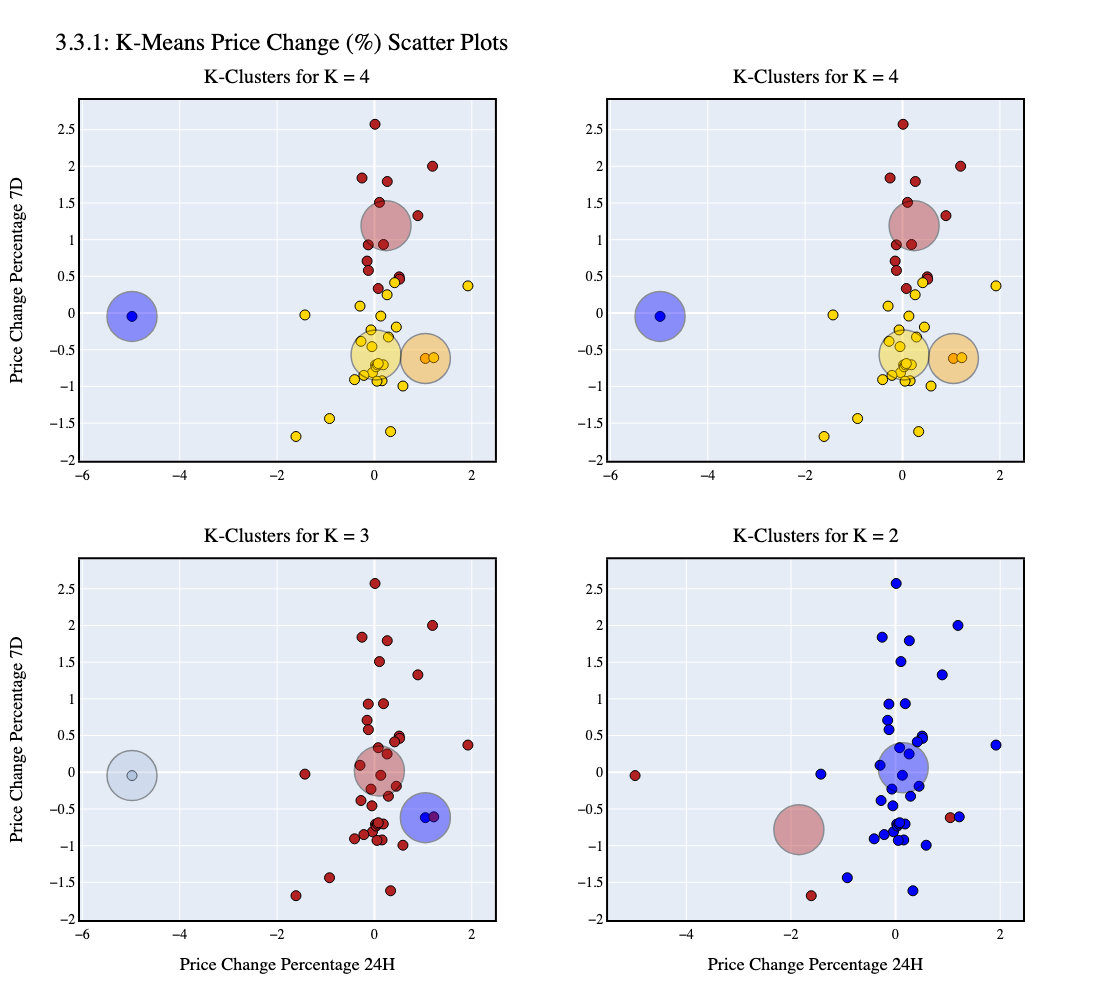

In [25]:
kmeans_analysis_functions.return_k_clusters_2d_scatter_plot \
    (normalized_crypto_dataframe, [4, 4, 3, 2], colors_string_list,
     '3.3.1: K-Means Price Change (%) Scatter Plots', 'price_change_percentage_24h', 'price_change_percentage_7d')

## **Section 3.4: Predictions to Normalized Data Scatter Plots (3-D)**

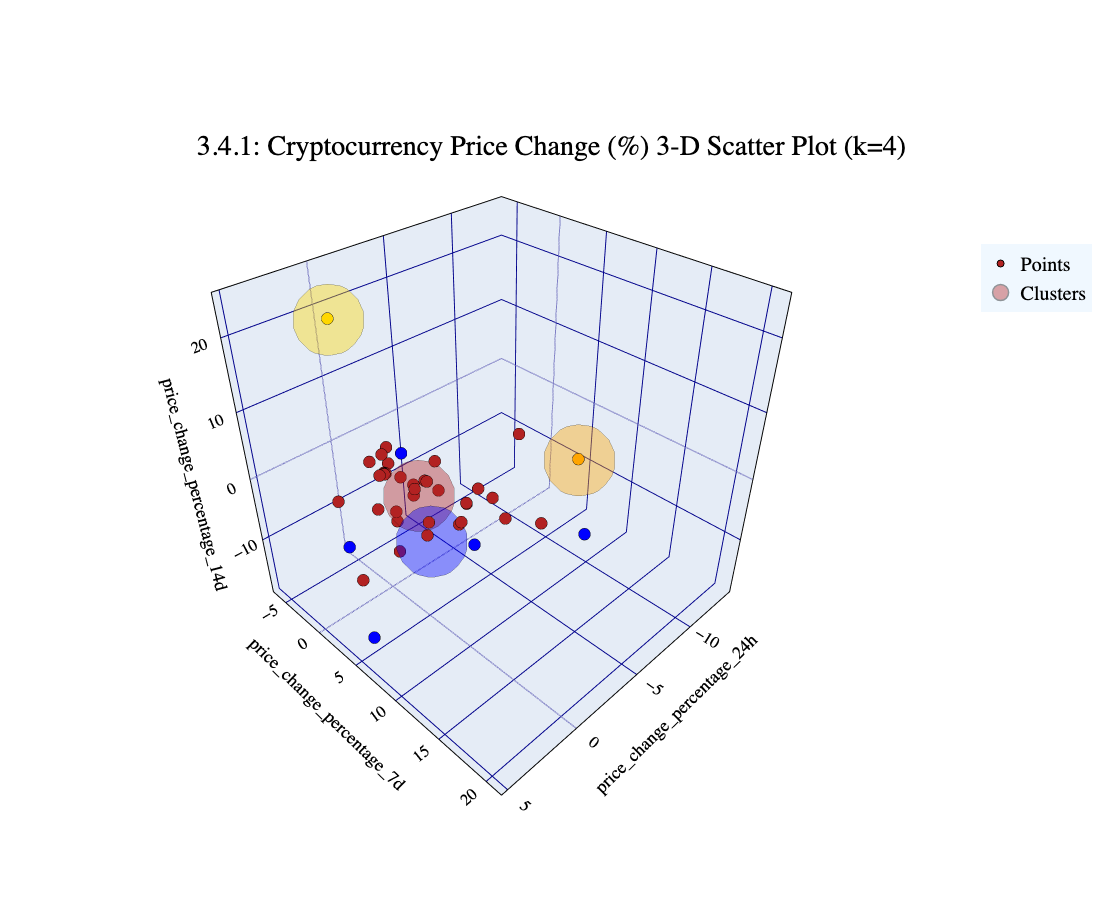

In [26]:
kmeans_analysis_functions.return_k_clusters_3d_scatter_plot \
        (crypto_dataframe, 4, colors_string_list, 
         '3.4.1: Cryptocurrency Price Change (%) 3-D Scatter Plot (k=4)',
         ['price_change_percentage_24h', 'price_change_percentage_7d', 'price_change_percentage_14d'])

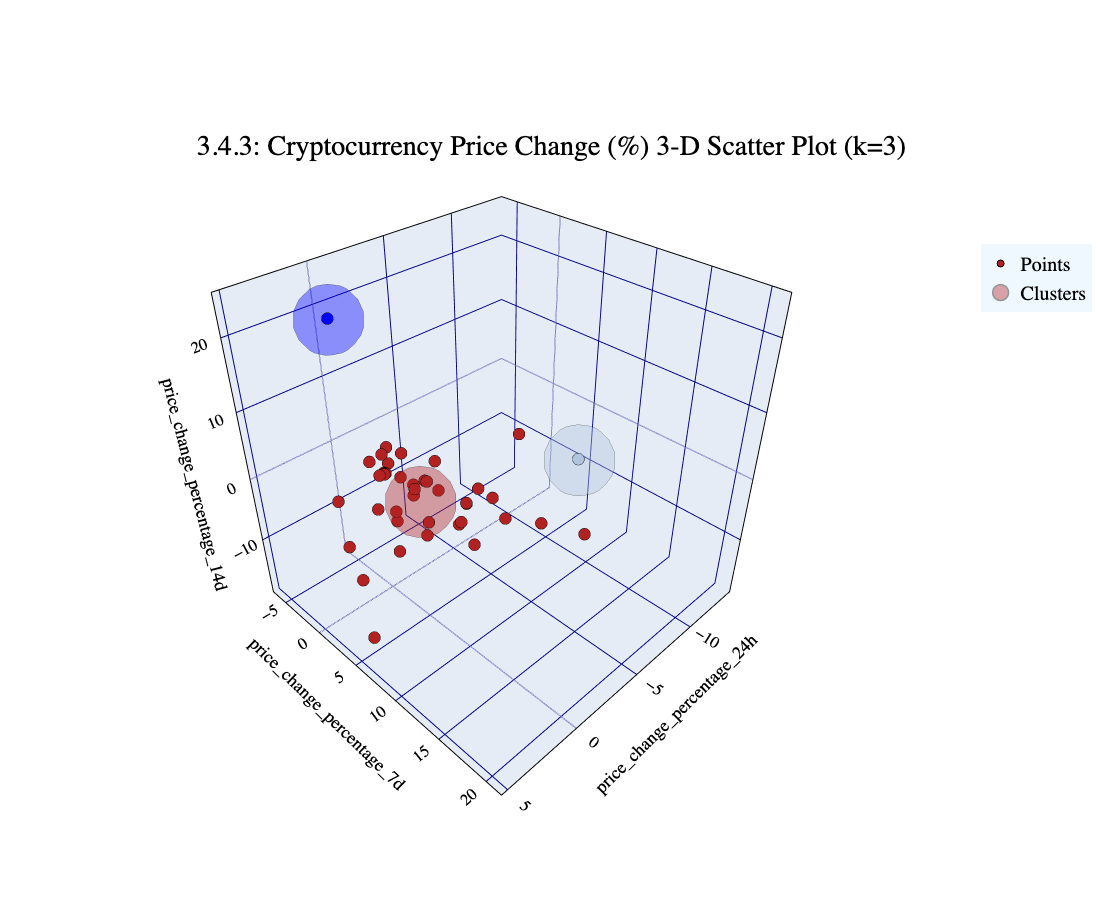

In [27]:
kmeans_analysis_functions.return_k_clusters_3d_scatter_plot \
    (crypto_dataframe, 3, colors_string_list, 
     '3.4.3: Cryptocurrency Price Change (%) 3-D Scatter Plot (k=3)',
     ['price_change_percentage_24h', 'price_change_percentage_7d', 'price_change_percentage_14d'])

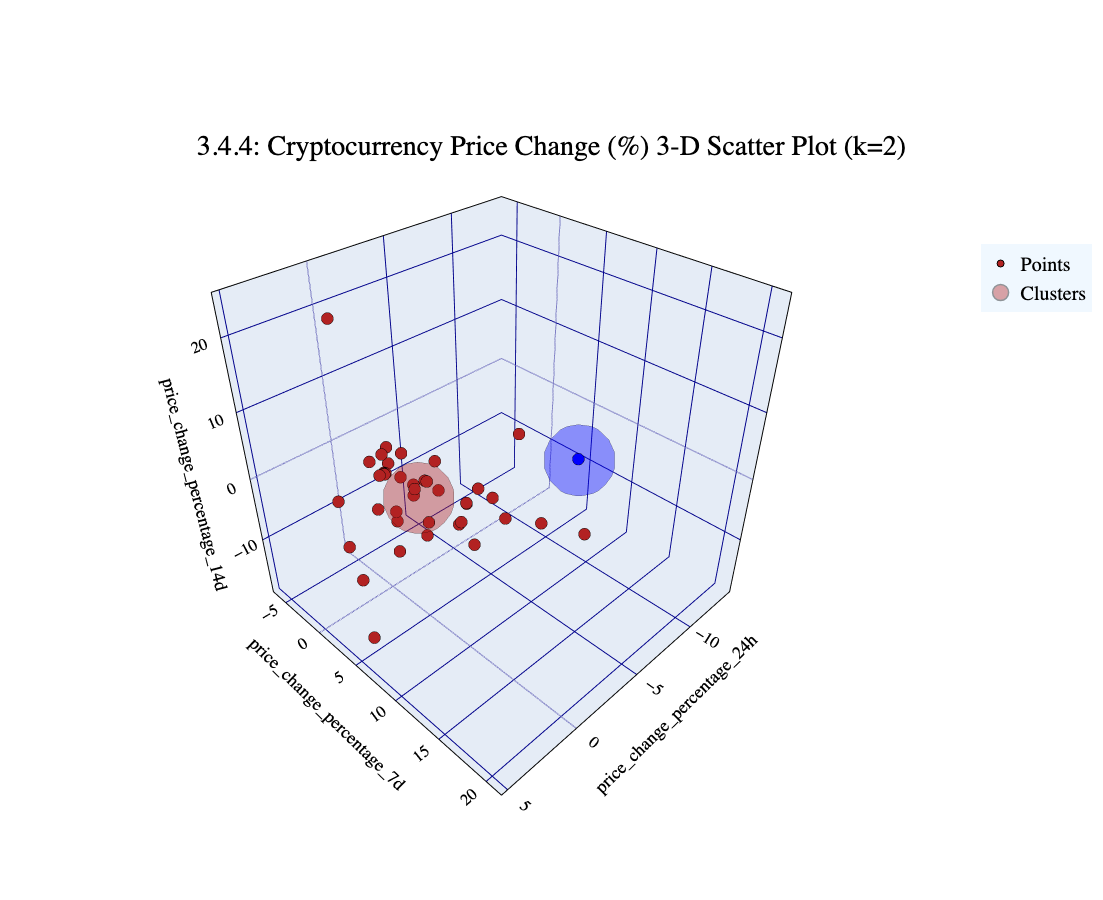

In [28]:
kmeans_analysis_functions.return_k_clusters_3d_scatter_plot \
    (crypto_dataframe, 2, colors_string_list, 
     '3.4.4: Cryptocurrency Price Change (%) 3-D Scatter Plot (k=2)',
     ['price_change_percentage_24h', 'price_change_percentage_7d', 'price_change_percentage_14d'])

# <br> **Section 4: Optimize Clusters with Principal Component Analysis.**

## **Section 4.1: PCA Component Explained Variance**

### **Calculations**

In [29]:
pca_model = PCA (n_components = 3)

In [30]:
crypto_pca_nparray = pca_model.fit_transform(normalized_crypto_dataframe)

crypto_pca_nparray[0:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

### **Display the Explained Variance for Each Component**

In [31]:
total_explained_variance = 0

for index, variance in enumerate(pca_model.explained_variance_ratio_):
    
    total_explained_variance += variance

    log_subroutines.print_and_log_text \
        (f'PCA{index + 1} explained variance: '
         + '\033[1m' + '{:.2f}%'.format(variance * 100) + '\033[0m')

PCA1 explained variance: 37.20%
PCA2 explained variance: 34.70%
PCA3 explained variance: 17.60%


In [32]:
log_subroutines.print_and_log_text \
    ('The total explained variance of the three principal components is '
     + '\033[1m' + '{:.2f}%\n\n'.format(total_explained_variance * 100) + '\033[0m')

The total explained variance of the three principal components is 89.50%




### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer: 89.50%** 

## **Section 4.2: PCA Cryptocurrency DataFrame**

### **Calculations**

In [33]:
pca_columns_string_list \
    = ['PCA{}'.format(n) for n in range(1, 4)]

crypto_pca_dataframe \
    = pd.DataFrame(crypto_pca_nparray, columns = pca_columns_string_list, index = normalized_crypto_dataframe.index)

log_subroutines.log_write_object(crypto_pca_dataframe)

### **Display PCA Cryptocurrency DataFrame**

In [34]:
pandas_process_functions.return_formatted_table \
    (crypto_pca_dataframe, 'Table 4.2.1: Cryptocurrencies PCA DataFrame Table', hide_index_boolean = False)

# <br> **Section 5: Find the Best Value for K Using the PCA Data**

## **Section 5.1:  K-Means Methods with PCA Data**

### **WCSS Elbow Method**

In [35]:
optimal_k_pca_elbow_integer, inertia_pca_elbow_series \
    = kmeans_analysis_functions.return_optimal_k_with_wcss_elbow(crypto_pca_dataframe)

log_subroutines.print_and_log_text \
    ('\033[1m' + 'Using the WCSS Elbow Method with PCA components, the optimal value for k is ' \
     + '{:,}.'.format(optimal_k_pca_elbow_integer) + '\033[0m')

Using the WCSS Elbow Method with PCA components, the optimal value for k is 4.


### **Calinski-Harabasz Method**

In [36]:
optimal_k_pca_calinski_harabasz_integer, inertia_pca_calinski_harabasz_series \
    = kmeans_analysis_functions.return_optimal_k_with_calinski_harabasz(crypto_pca_dataframe)

log_subroutines.print_and_log_text \
    ('\033[1m' + 'Using the Calinski-Harabasz Method with PCA components, the optimal value for k is ' \
     + '{:,}.'.format(optimal_k_pca_calinski_harabasz_integer) + '\033[0m')

Using the Calinski-Harabasz Method with PCA components, the optimal value for k is 10.


### **Silhouette method**

In [37]:
optimal_k_pca_silhouette_integer, inertia_pca_silhouette_series \
    = kmeans_analysis_functions.return_optimal_k_with_silhouette(crypto_pca_dataframe)

log_subroutines.print_and_log_text \
    ('\033[1m' + 'Using the Silhouette Method with PCA components, the optimal value for k is ' \
     + '{:,}.'.format(optimal_k_pca_silhouette_integer) + '\033[0m')

Using the Silhouette Method with PCA components, the optimal value for k is 3.


### **Davies-Bouldin Method**

In [38]:
optimal_k_pca_davies_bouldin_integer, inertia_pca_davies_bouldin_series \
    = kmeans_analysis_functions.return_optimal_k_with_davies_bouldin(crypto_pca_dataframe)

log_subroutines.print_and_log_text \
    ('\033[1m' + 'Using the Davies-Bouldin Method with PCA components, the optimal value for k is ' \
     + '{:,}.'.format(optimal_k_pca_davies_bouldin_integer) + '\033[0m')

Using the Davies-Bouldin Method with PCA components, the optimal value for k is 2.


## **Section 5.2:  Display Methods with PCA Data Plots**

### **Display Line Graphs**

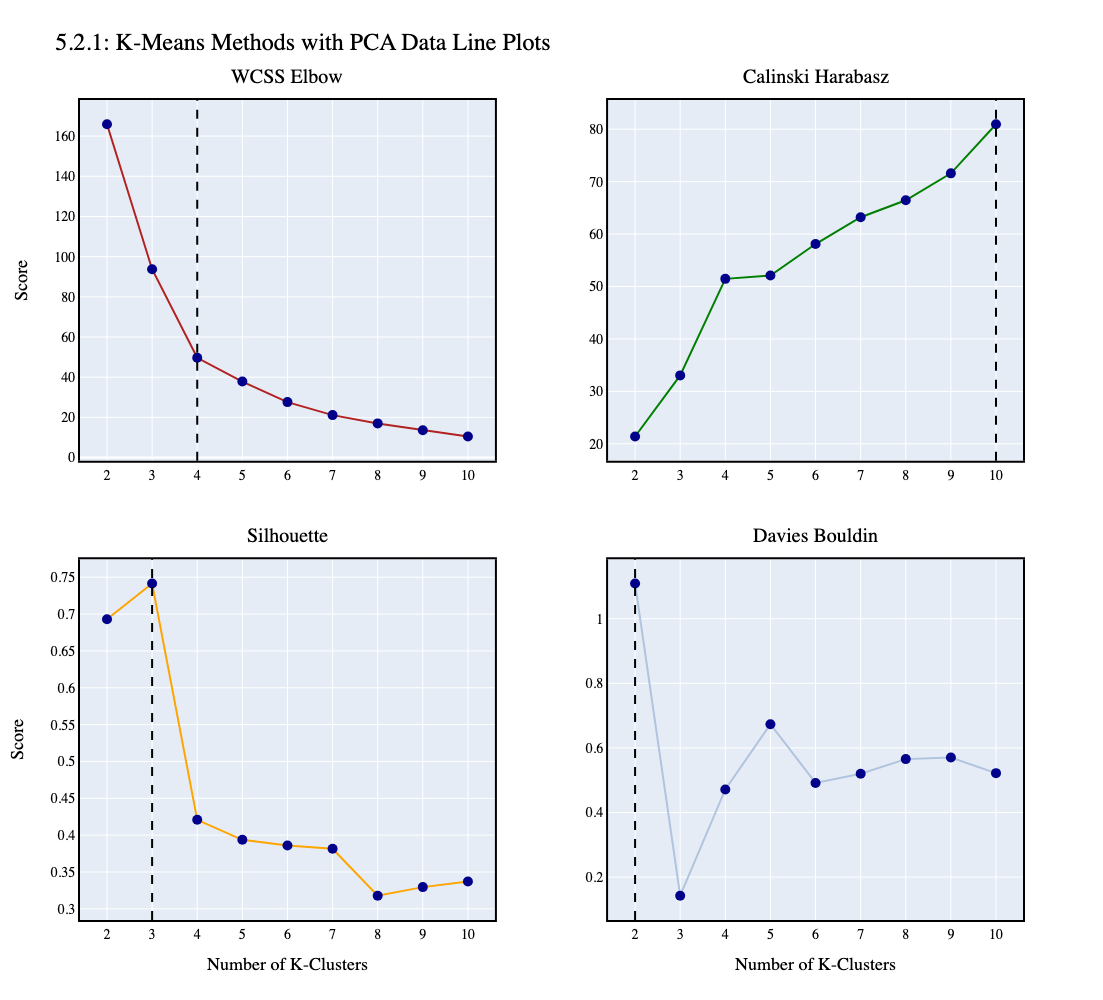

In [39]:
inertia_pca_series_list \
    = [inertia_pca_elbow_series, 
       inertia_pca_calinski_harabasz_series,
       inertia_pca_silhouette_series, 
       inertia_pca_davies_bouldin_series]

optimal_k_pca_integer_list \
    = [optimal_k_pca_elbow_integer, 
       optimal_k_pca_calinski_harabasz_integer,
       optimal_k_pca_silhouette_integer, 
       optimal_k_pca_davies_bouldin_integer]

colors_string_list \
    = ['firebrick', 
       'green',
       'orange',
       'lightsteelblue', 
       'gold', 
       'purple', 
       'blue']

kmeans_analysis_functions.return_cluster_plots \
    (optimal_k_pca_integer_list, 
     inertia_pca_series_list, 
     colors_string_list,
     '5.2.1: K-Means Methods with PCA Data Line Plots')

### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** Although k=2, k=3, k=4, and k=10 are possible answers, the cluster predictions from the WCSS Elbow Method point to k=4 being the best value for `k`.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No. The only real deviation from the previous results is the Calinski-Harabasz method with k=10, but the Calinski-Harabasz index may not work well for finding the best k in PCA situations; ultimately, selecting the appropriate number of clusters is subjective, with k=3 and k=4 being the reasonable options.

# <br> **Section 6: Cluster Cryptocurrencies with K-means Using PCA Data**

## **Section 6.1: Predict the Clusters to Group the Cryptocurrencies Using PCA Data**

### **Calculations**

In [40]:
predictions_pca_integer_list_list \
    = kmeans_analysis_functions.return_cluster_predictions(crypto_pca_dataframe, [2, 3, 4, 10])

### **Display**

In [41]:
log_subroutines.print_and_log_text \
    ('\033[1m' + 'The array of cluster predictions for k = 2 using PCA data is as follows:\n\n' + '\033[0m'
     + f'{predictions_pca_integer_list_list[0]}')

The array of cluster predictions for k = 2 using PCA data is as follows:

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0
 1 1 1 1]


In [42]:
log_subroutines.print_and_log_text \
    ('\033[1m' + 'The array of cluster predictions for k = 3 using PCA data is as follows:\n\n' + '\033[0m'
     + f'{predictions_pca_integer_list_list[1]}')

The array of cluster predictions for k = 3 using PCA data is as follows:

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1
 0 0 0 0]


In [43]:
log_subroutines.print_and_log_text \
    ('\033[1m' + 'The array of cluster predictions for k = 4 using PCA data is as follows:\n\n' + '\033[0m'
     + f'{predictions_pca_integer_list_list[2]}')

The array of cluster predictions for k = 4 using PCA data is as follows:

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [44]:
log_subroutines.print_and_log_text \
    ('\033[1m' + 'The array of cluster predictions for k = 10 using PCA data is as follows:\n\n' + '\033[0m'
     + f'{predictions_pca_integer_list_list[3]}')

The array of cluster predictions for k = 10 using PCA data is as follows:

[6 6 0 0 7 6 3 3 6 9 5 0 0 7 9 9 5 9 3 0 5 6 0 0 0 0 9 5 6 4 9 9 2 9 8 0 1
 5 9 0 0]


## **Section 6.2: Add Predictions to Normalized DataFrame Using PCA Data**

### **Calculations**

In [45]:
crypto_pca_prediction_dataframe = crypto_pca_dataframe.copy()

for index, prediction in enumerate(predictions_pca_integer_list_list):      
    
    crypto_pca_prediction_dataframe['Pca_cluster' + str(index + 3)] = predictions_pca_integer_list_list[index]

### **Display Cryptocurrency with Predictions Using PCA Data**

In [46]:
pandas_process_functions.return_formatted_table \
    (crypto_pca_prediction_dataframe, 
     'Table 6.2.1: Cryptocurrency with Predictions Using PCA Data Table', 
     hide_index_boolean = False)

## **Section 6.3: Predictions to Normalized Data Scatter Plots Using PCA Data (2-D)**

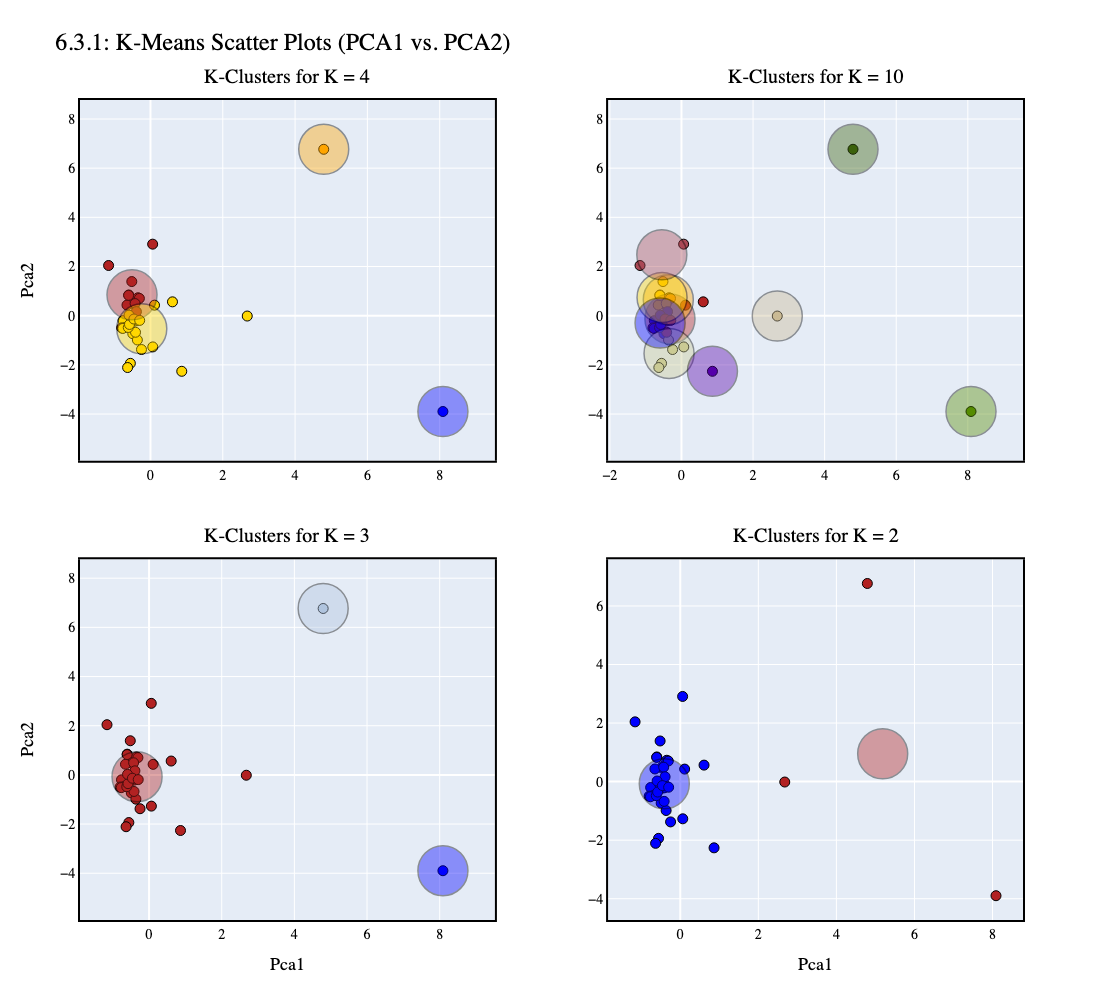

In [47]:
kmeans_analysis_functions.return_k_clusters_2d_scatter_plot \
    (crypto_pca_dataframe, [4, 10, 3, 2], colors_string_list,
     '6.3.1: K-Means Scatter Plots (PCA1 vs. PCA2)', 'PCA1', 'PCA2')

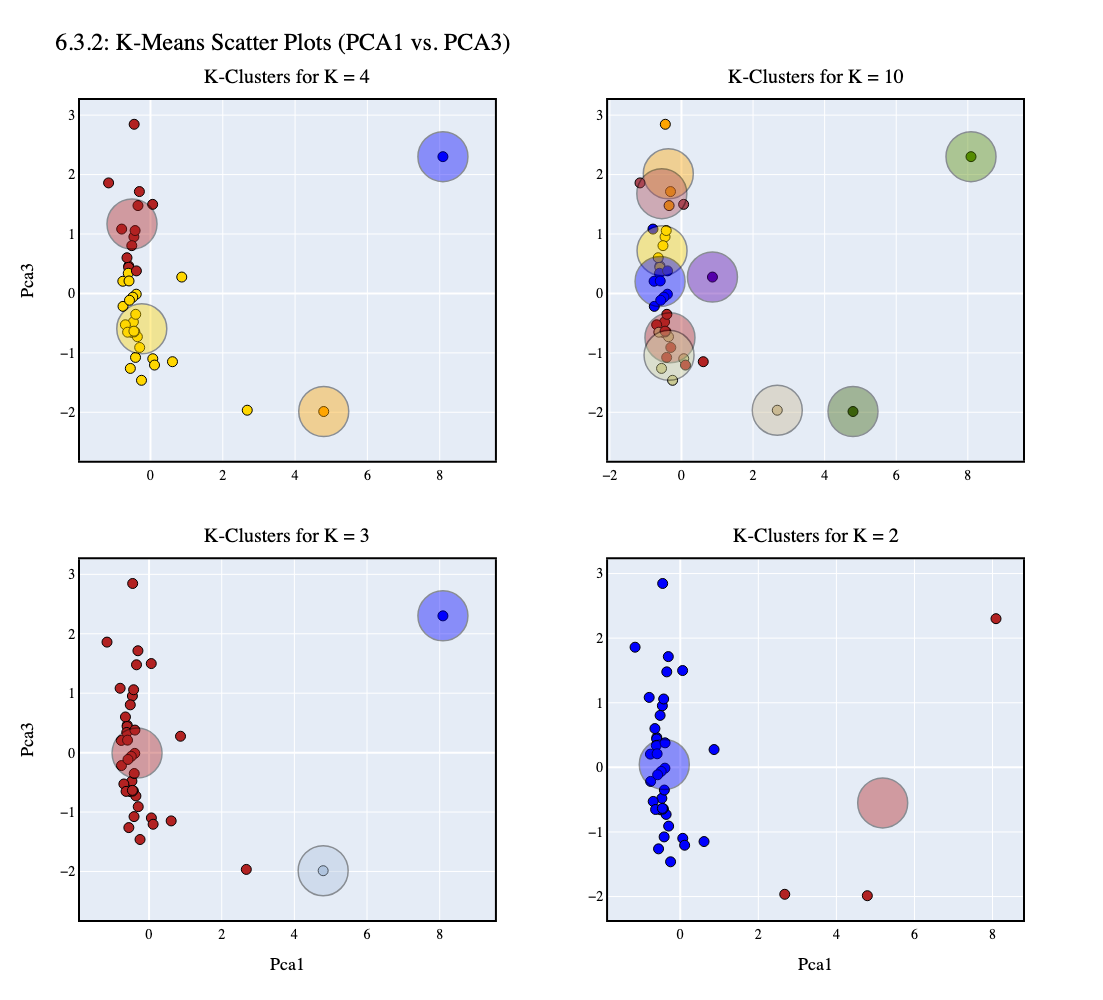

In [48]:
kmeans_analysis_functions.return_k_clusters_2d_scatter_plot \
    (crypto_pca_dataframe, [4, 10, 3, 2], colors_string_list,
     '6.3.2: K-Means Scatter Plots (PCA1 vs. PCA3)', 'PCA1', 'PCA3')

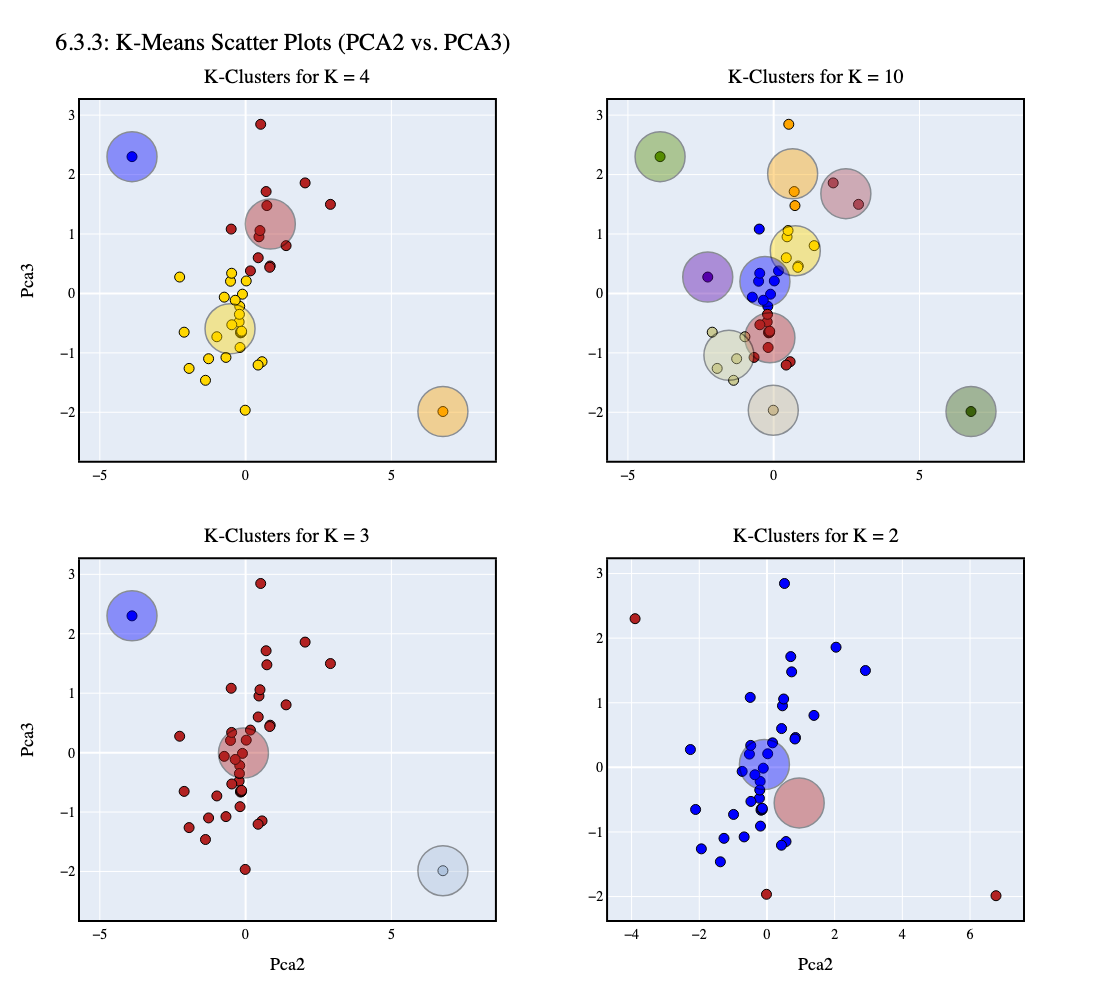

In [49]:
kmeans_analysis_functions.return_k_clusters_2d_scatter_plot \
    (crypto_pca_dataframe, [4, 10, 3, 2], colors_string_list,
     '6.3.3: K-Means Scatter Plots (PCA2 vs. PCA3)', 'PCA2', 'PCA3')

## **Section 6.4: Predictions to Cryptocurrency Data Using PCA 3-D Scatter Plot (3-D)**

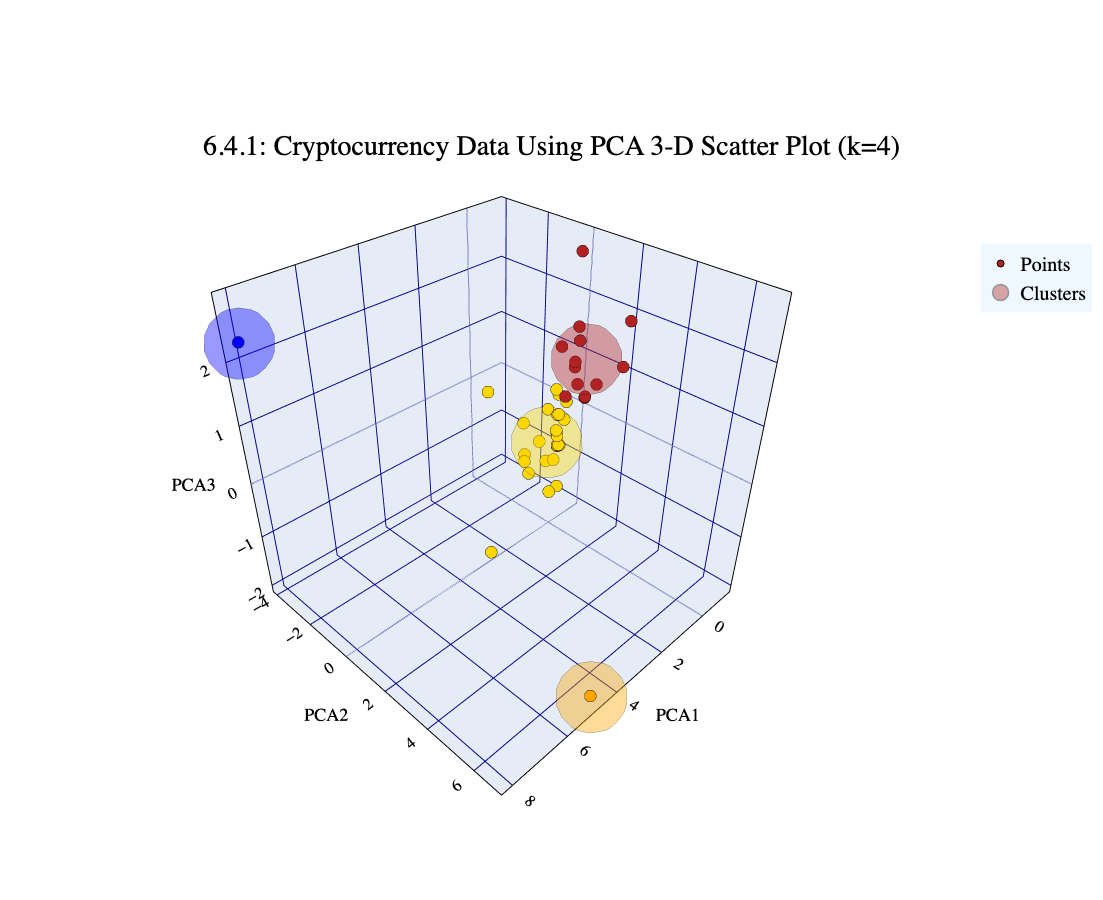

In [50]:
kmeans_analysis_functions.return_k_clusters_3d_scatter_plot \
    (crypto_pca_dataframe, 4, colors_string_list, 
     '6.4.1: Cryptocurrency Data Using PCA 3-D Scatter Plot (k=4)', ['PCA1', 'PCA2', 'PCA3'])

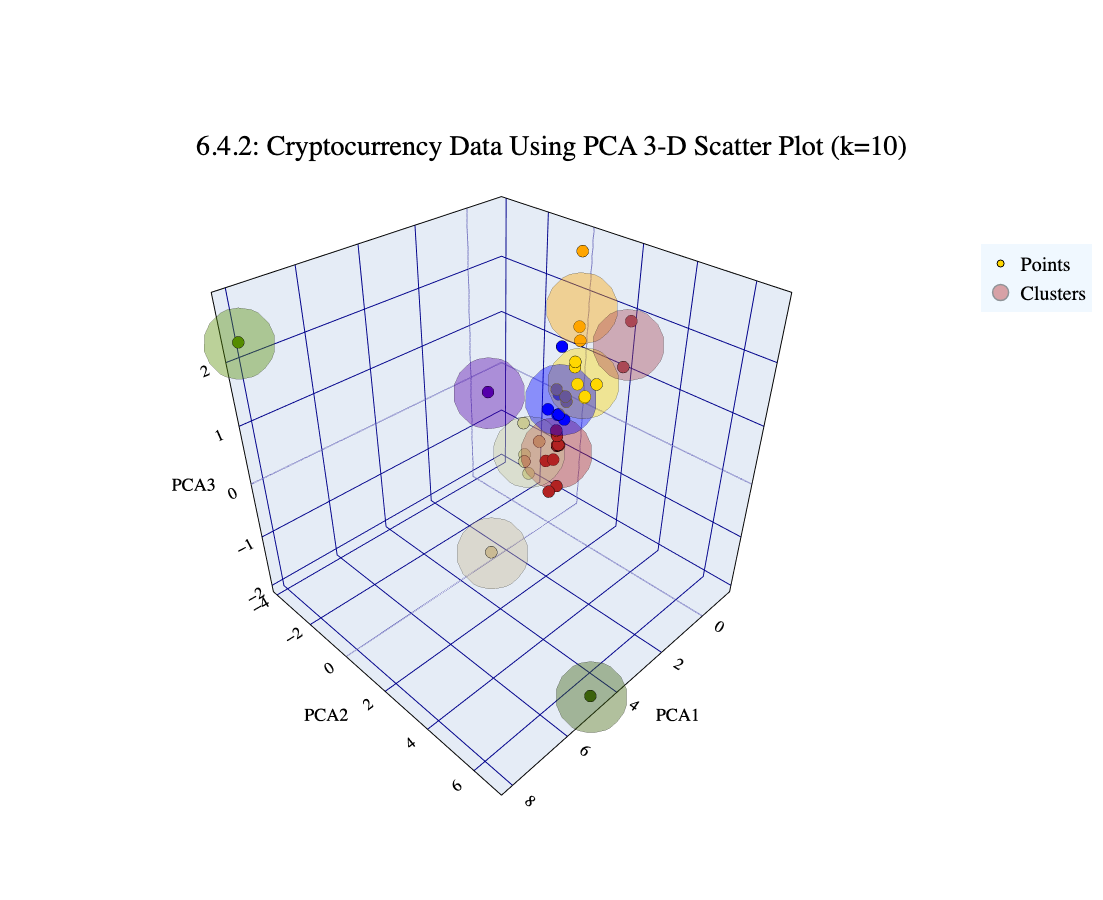

In [51]:
kmeans_analysis_functions.return_k_clusters_3d_scatter_plot \
    (crypto_pca_dataframe, 10, colors_string_list, 
     '6.4.2: Cryptocurrency Data Using PCA 3-D Scatter Plot (k=10)', ['PCA1', 'PCA2', 'PCA3'])

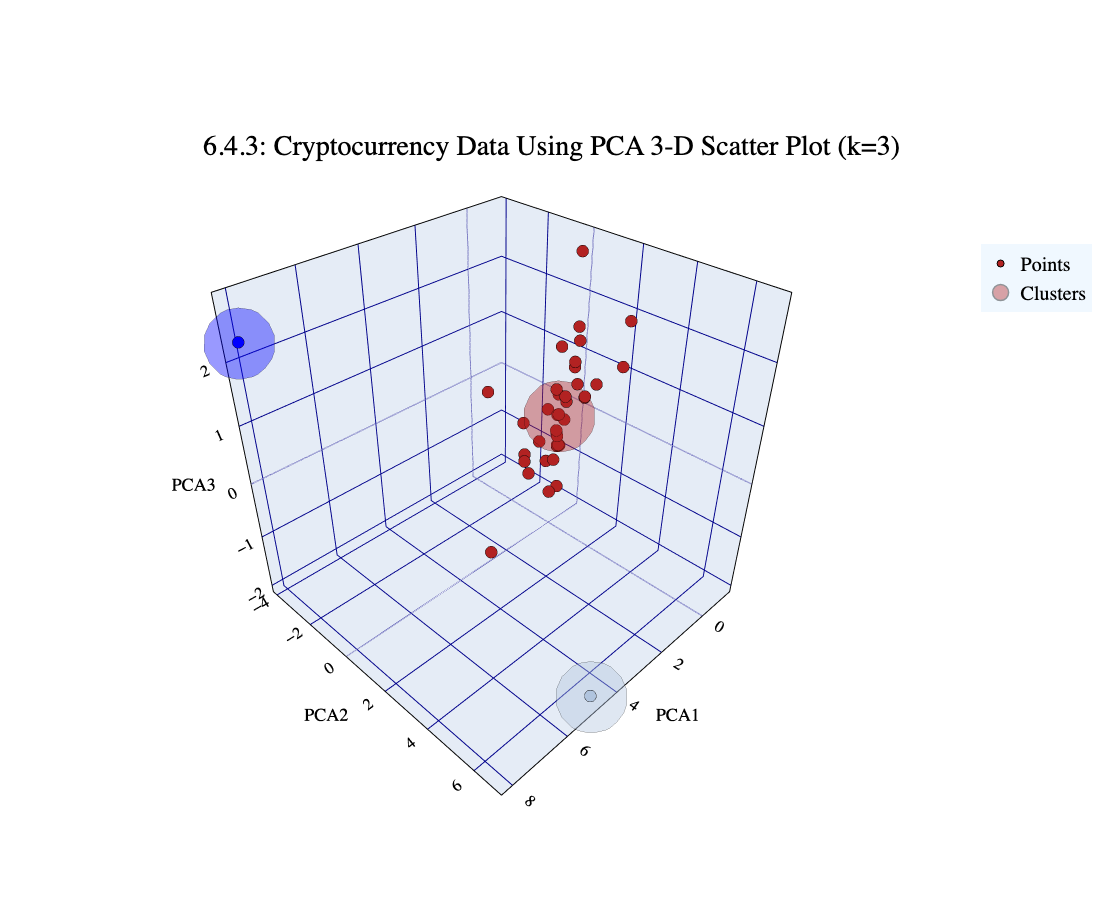

In [52]:
kmeans_analysis_functions.return_k_clusters_3d_scatter_plot \
    (crypto_pca_dataframe, 3, colors_string_list, 
     '6.4.3: Cryptocurrency Data Using PCA 3-D Scatter Plot (k=3)', ['PCA1', 'PCA2', 'PCA3'])

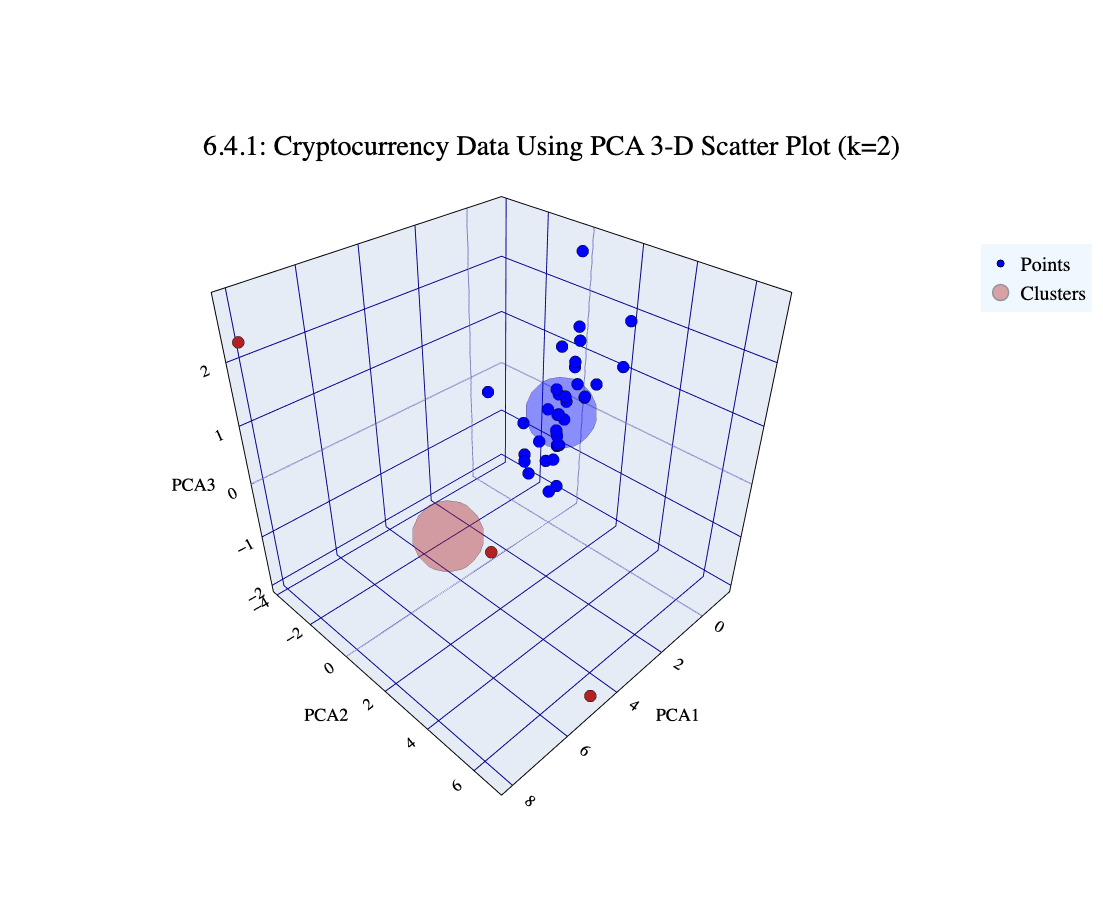

In [53]:
kmeans_analysis_functions.return_k_clusters_3d_scatter_plot \
    (crypto_pca_dataframe, 2, colors_string_list, 
     '6.4.1: Cryptocurrency Data Using PCA 3-D Scatter Plot (k=2)', ['PCA1', 'PCA2', 'PCA3'])

# <br> **Section 7: Visualize and Compare the Results**

## **7.1: Contrast Elbow Method Line Curves for K=4**

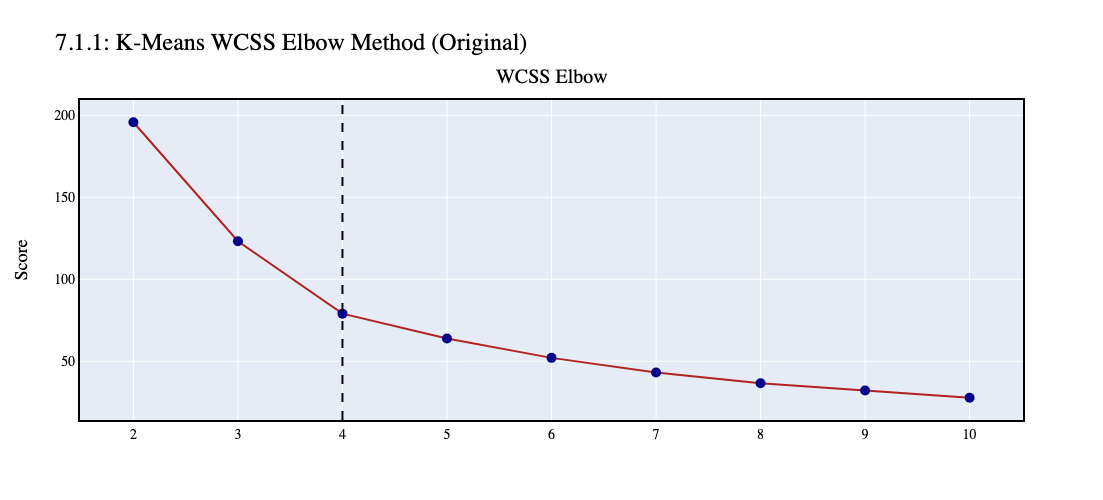

In [54]:
kmeans_analysis_functions.return_cluster_plots \
    ([optimal_k_elbow_integer], [inertia_elbow_series], colors_string_list,
     '7.1.1: K-Means WCSS Elbow Method (Original)')

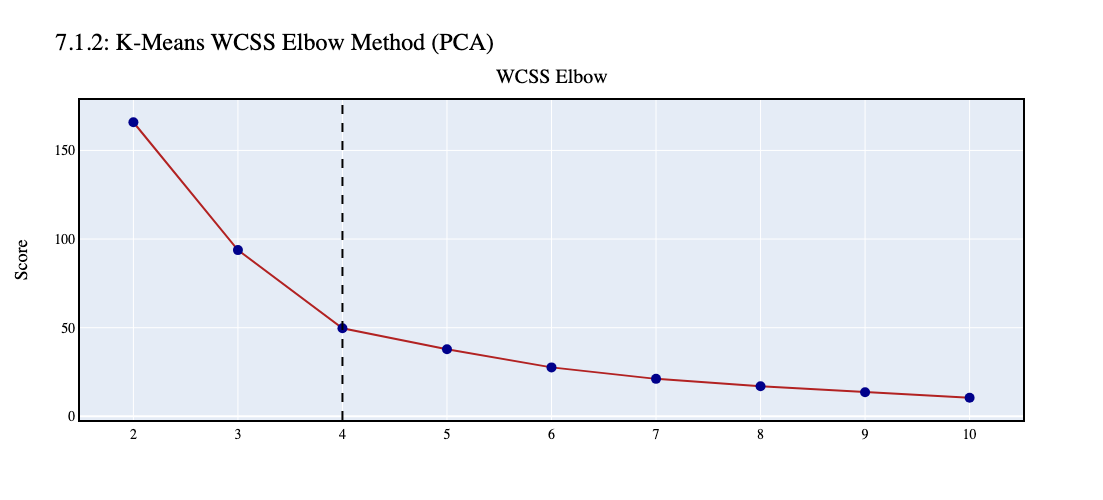

In [55]:
kmeans_analysis_functions.return_cluster_plots \
    ([optimal_k_pca_elbow_integer], [inertia_pca_elbow_series], colors_string_list,
     '7.1.2: K-Means WCSS Elbow Method (PCA)')

## **7.2: Contrast Scatter Plots for K=4**

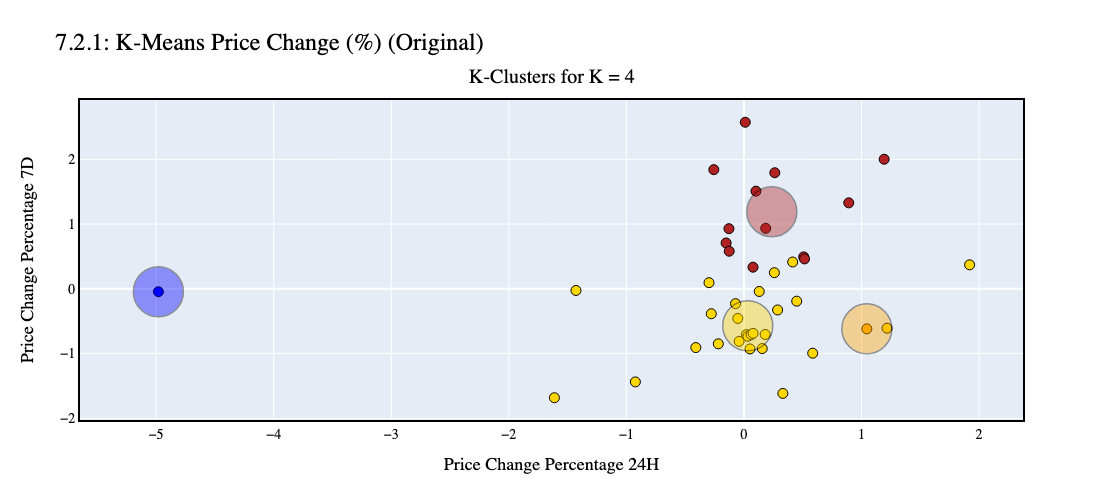

In [56]:
kmeans_analysis_functions.return_k_clusters_2d_scatter_plot \
    (normalized_crypto_dataframe, [4], colors_string_list,
     '7.2.1: K-Means Price Change (%) (Original)', 'price_change_percentage_24h', 'price_change_percentage_7d')

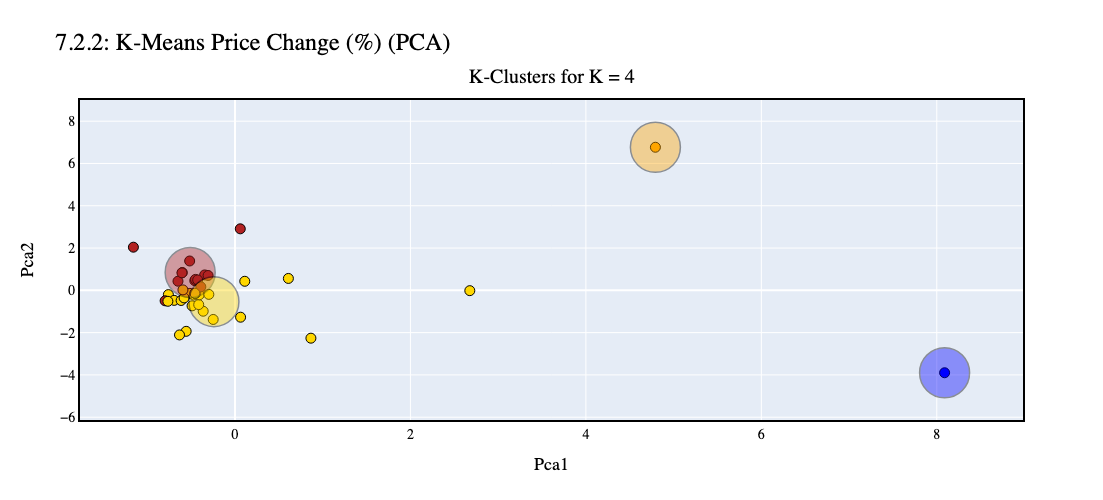

In [57]:
kmeans_analysis_functions.return_k_clusters_2d_scatter_plot \
    (crypto_pca_dataframe, [4], colors_string_list,
     '7.2.2: K-Means Price Change (%) (PCA)', 'PCA1', 'PCA2')

## **7.3: Contrast 3-D Scatter Plots for K=4**

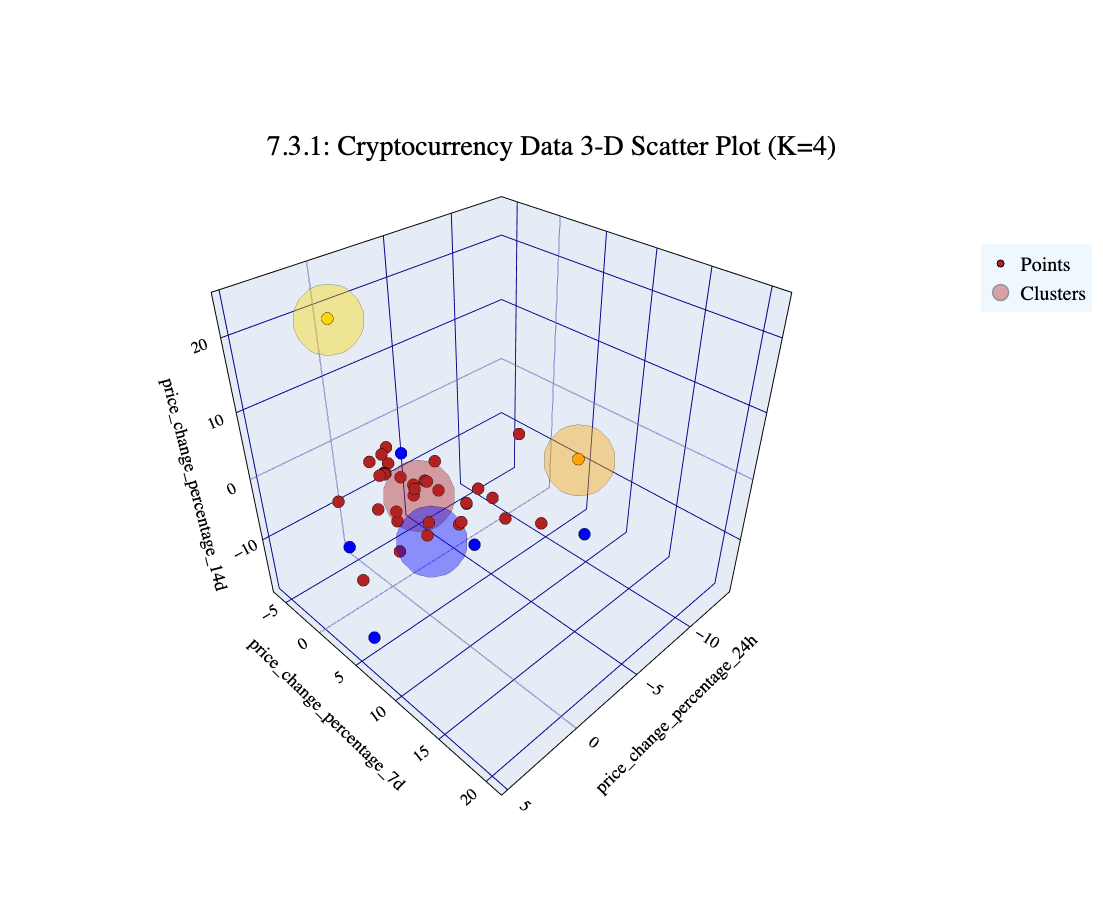

In [58]:
kmeans_analysis_functions.return_k_clusters_3d_scatter_plot \
    (crypto_dataframe, 4, colors_string_list, 
     '7.3.1: Cryptocurrency Data 3-D Scatter Plot (K=4)',
     ['price_change_percentage_24h', 'price_change_percentage_7d', 'price_change_percentage_14d'])

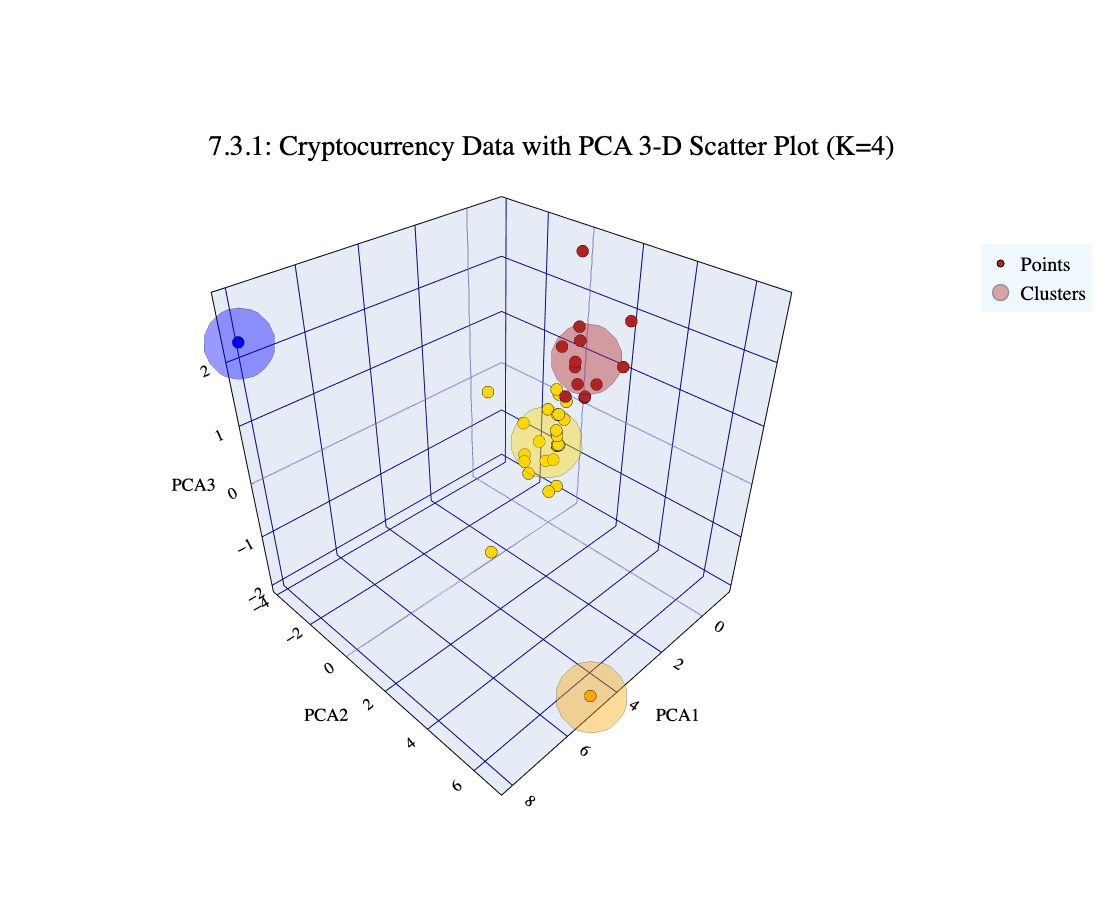

In [59]:
kmeans_analysis_functions.return_k_clusters_3d_scatter_plot \
    (crypto_pca_dataframe, 4, colors_string_list, 
     '7.3.1: Cryptocurrency Data with PCA 3-D Scatter Plot (K=4)', ['PCA1', 'PCA2', 'PCA3'])

### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** After examining the cluster analysis results visually, the cluster distribution for PCA data has better performance and tighter grouping of data points within each cluster.  Using fewer features with the PCA data has had a positive impact with better-defined and separable clusters compared to the original data. This reduction has helped to highlight patterns and reduce the impact of noise, leading to more meaningful clustering results.

In [60]:
#log_subroutine.end_program()